# Import Library

In [1]:
# Tambahkan library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Exploratory Data Analysis

In [3]:
df_train.head()

,id,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,0,Desktop,Dell,Dell Station LEQ,2022.0,NaN,Mini-ITX,Intel,NaN,2.0,...,2560x1440,90.0,0.0,0.0,750.0,Wi-Fi 6E,5.2,11.00,24.0,1190.99
1,1,NaN,Apple,Apple Creator RI1,2024.0,macOS,Ultrabook,Apple,Apple M1,2.0,...,2880x1800,120.0,56.0,NaN,0.0,Wi-Fi 6,NaN,0.97,48.0,2249.99
2,2,Desktop,ASUS,ASUS Creator RFG,2021.0,Windows,Mini-ITX,NaN,Intel i5-11411,NaN,...,2560x1440,60.0,0.0,0.0,NaN,Wi-Fi 6E,5.0,8.00,NaN,1576.99
3,3,Desktop,Dell,Dell Station 040,2025.0,Windows,SFF,AMD,AMD Ryzen 3 6581,1.0,...,3440x1440,120.0,0.0,NaN,850.0,Wi-Fi 6E,5.3,5.00,36.0,1190.99
4,4,NaN,Samsung,NaN,2024.0,NaN,Gaming,NaN,Intel i5-10604,2.0,...,1920x1080,NaN,70.0,45.0,0.0,Wi-Fi 6,5.2,1.37,NaN,1874.99


In [4]:
df_train.describe(include='all')

,id,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,40000.00000,36000,35960,35920,35880.000000,35840,35800,35760,35720,35680.000000,...,35080,35040.000000,35000.000000,34960.000000,34920.000000,34880,34840.000000,34800.000000,34760.000000,40000.000000
unique,NaN,2,10,35800,NaN,4,10,3,18093,NaN,...,6,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,Laptop,Lenovo,MSI Zen KZQ,NaN,Windows,Mainstream,Intel,Apple M2 Pro,NaN,...,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,NaN,21530,5762,2,NaN,25667,6436,18916,514,NaN,...,16851,NaN,NaN,NaN,NaN,16157,NaN,NaN,NaN,NaN
mean,19999.50000,NaN,NaN,NaN,2022.323021,NaN,NaN,NaN,NaN,3.150533,...,NaN,98.381421,41.962171,61.831665,270.924971,NaN,5.084856,4.300461,22.136133,1927.909075
std,11547.14972,NaN,NaN,NaN,2.026884,NaN,NaN,NaN,NaN,1.371866,...,NaN,43.096504,35.870460,62.908787,353.414454,NaN,0.245793,3.836200,10.226171,581.485686
min,0.00000,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,4.200000,0.920000,12.000000,372.990000
25%,9999.75000,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,5.000000,1.500000,12.000000,1505.990000
50%,19999.50000,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,...,NaN,90.000000,56.000000,65.000000,0.000000,NaN,5.100000,2.000000,24.000000,1863.990000
75%,29999.25000,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,...,NaN,120.000000,70.000000,90.000000,650.000000,NaN,5.200000,7.000000,24.000000,2285.990000


In [5]:
df_train.nunique()

id                     40000
device_type                2
brand                     10
model                  35800
release_year               8
os                         4
form_factor               10
cpu_brand                  3
cpu_model              18093
cpu_tier                   6
cpu_cores                 12
cpu_threads               25
cpu_base_ghz               8
cpu_boost_ghz             18
gpu_brand                  4
gpu_model                 49
gpu_tier                   6
vram_gb                    8
ram_gb                    15
storage_type               4
storage_gb                 5
storage_drive_count        4
display_type               6
display_size_in            9
resolution                 6
refresh_hz                 6
battery_wh                 8
charger_watts              7
psu_watts                  9
wifi                       4
bluetooth                  5
weight_kg                 47
warranty_months            4
price                   2972
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   40000 non-null  int64  
 1   device_type          36000 non-null  object 
 2   brand                35960 non-null  object 
 3   model                35920 non-null  object 
 4   release_year         35880 non-null  float64
 5   os                   35840 non-null  object 
 6   form_factor          35800 non-null  object 
 7   cpu_brand            35760 non-null  object 
 8   cpu_model            35720 non-null  object 
 9   cpu_tier             35680 non-null  float64
 10  cpu_cores            35640 non-null  float64
 11  cpu_threads          35600 non-null  float64
 12  cpu_base_ghz         35560 non-null  float64
 13  cpu_boost_ghz        35520 non-null  float64
 14  gpu_brand            35480 non-null  object 
 15  gpu_model            35440 non-null 

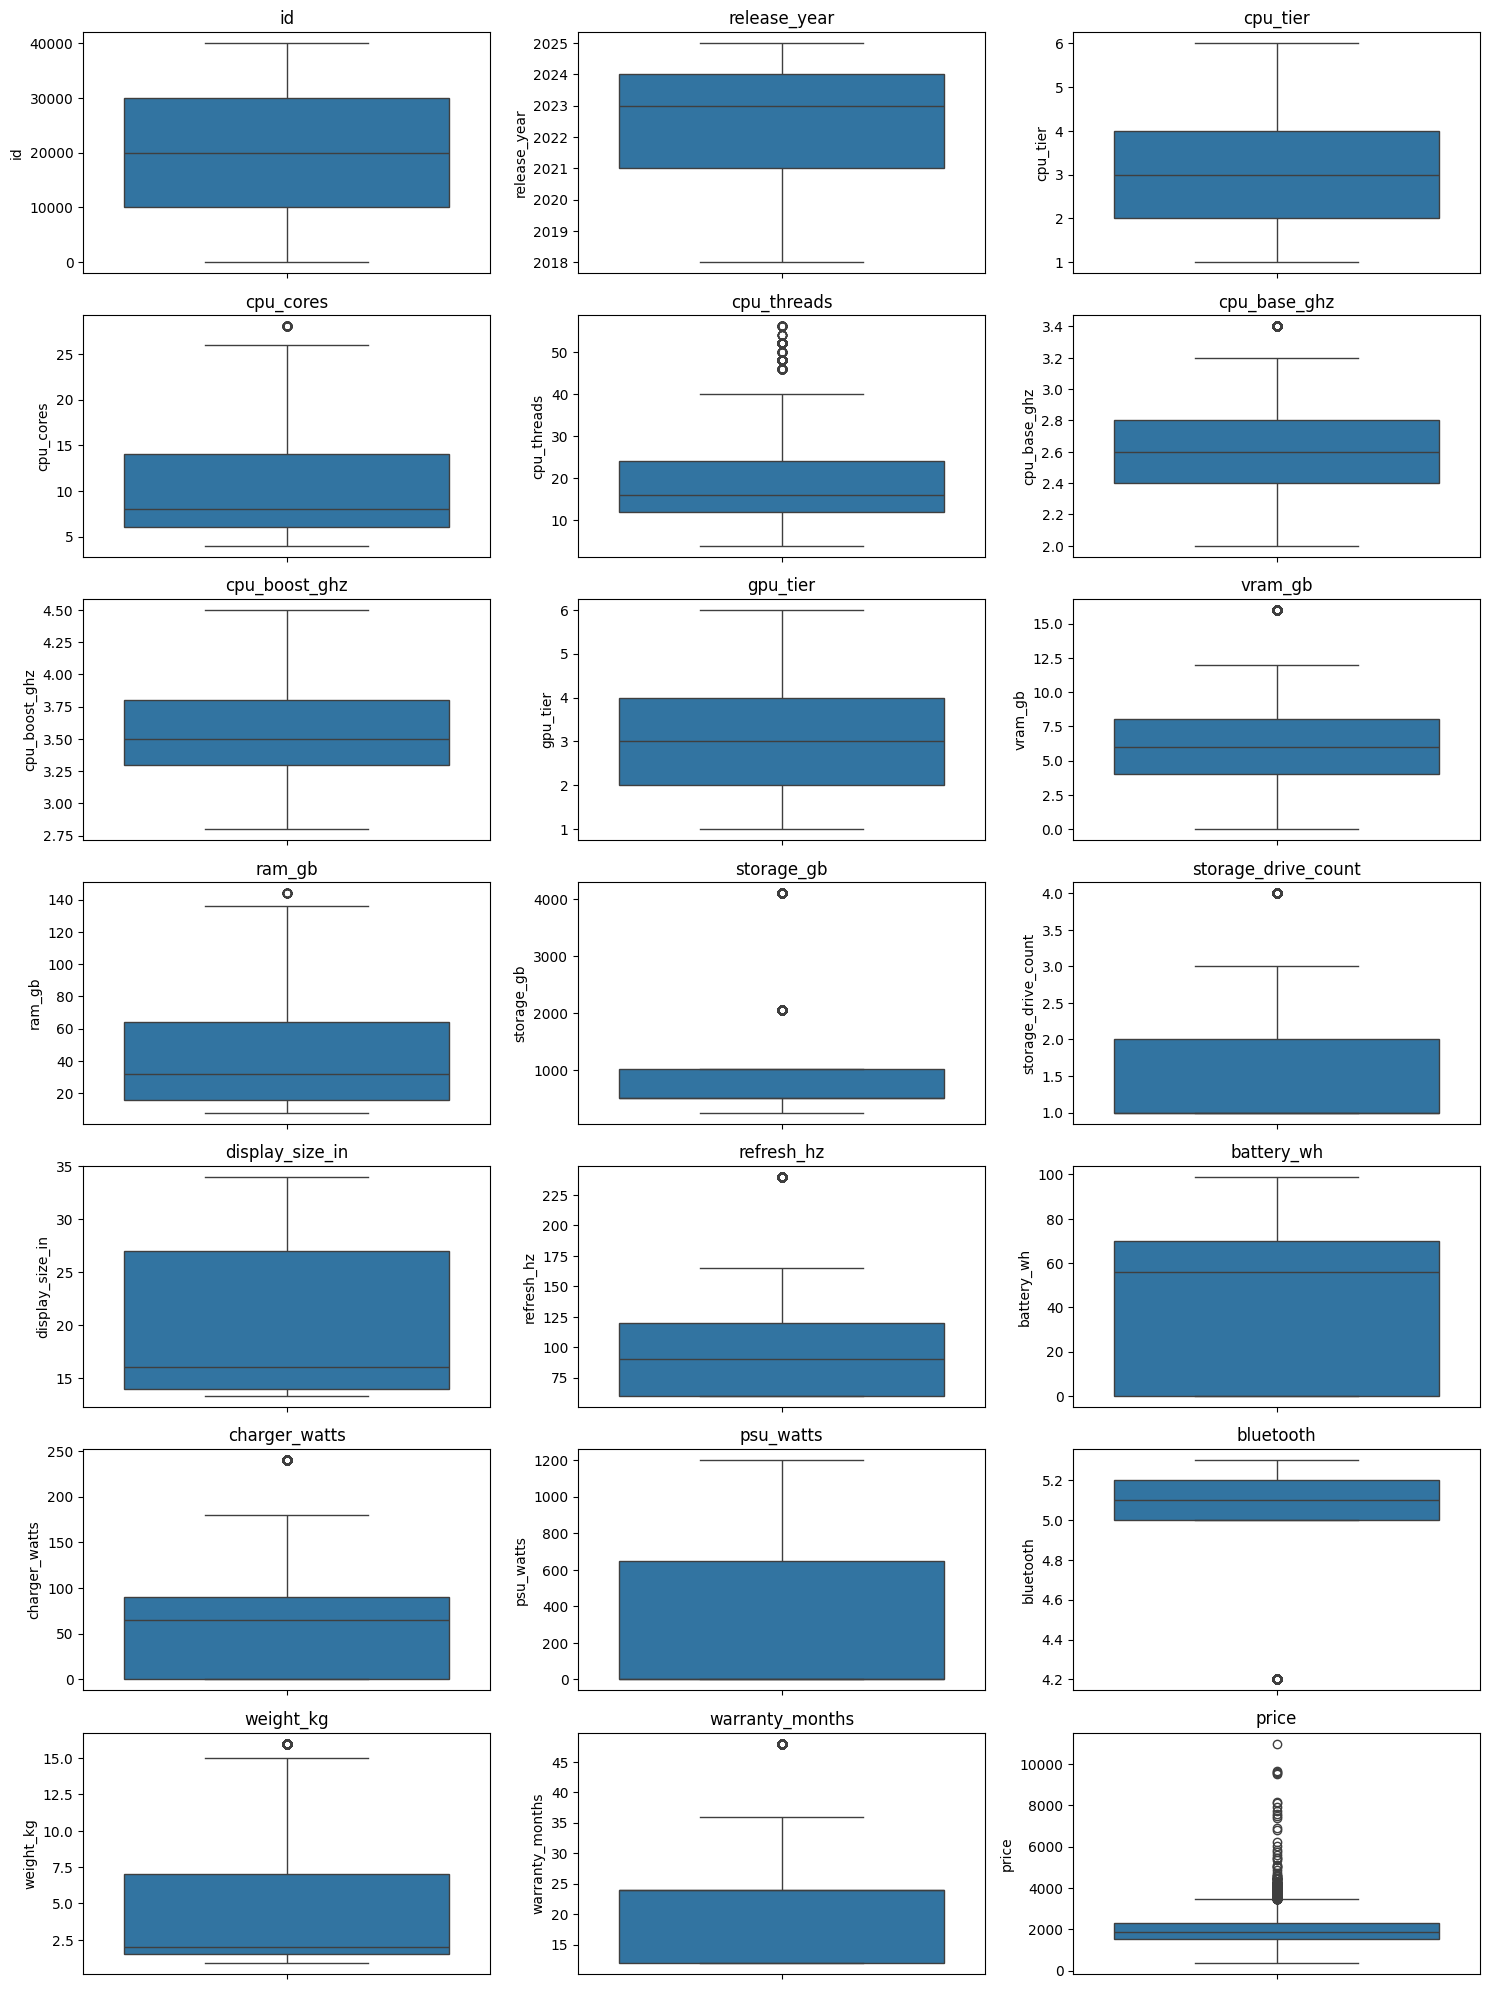

In [7]:
kolom_numerik = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(7, 3, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.boxplot(df_train[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

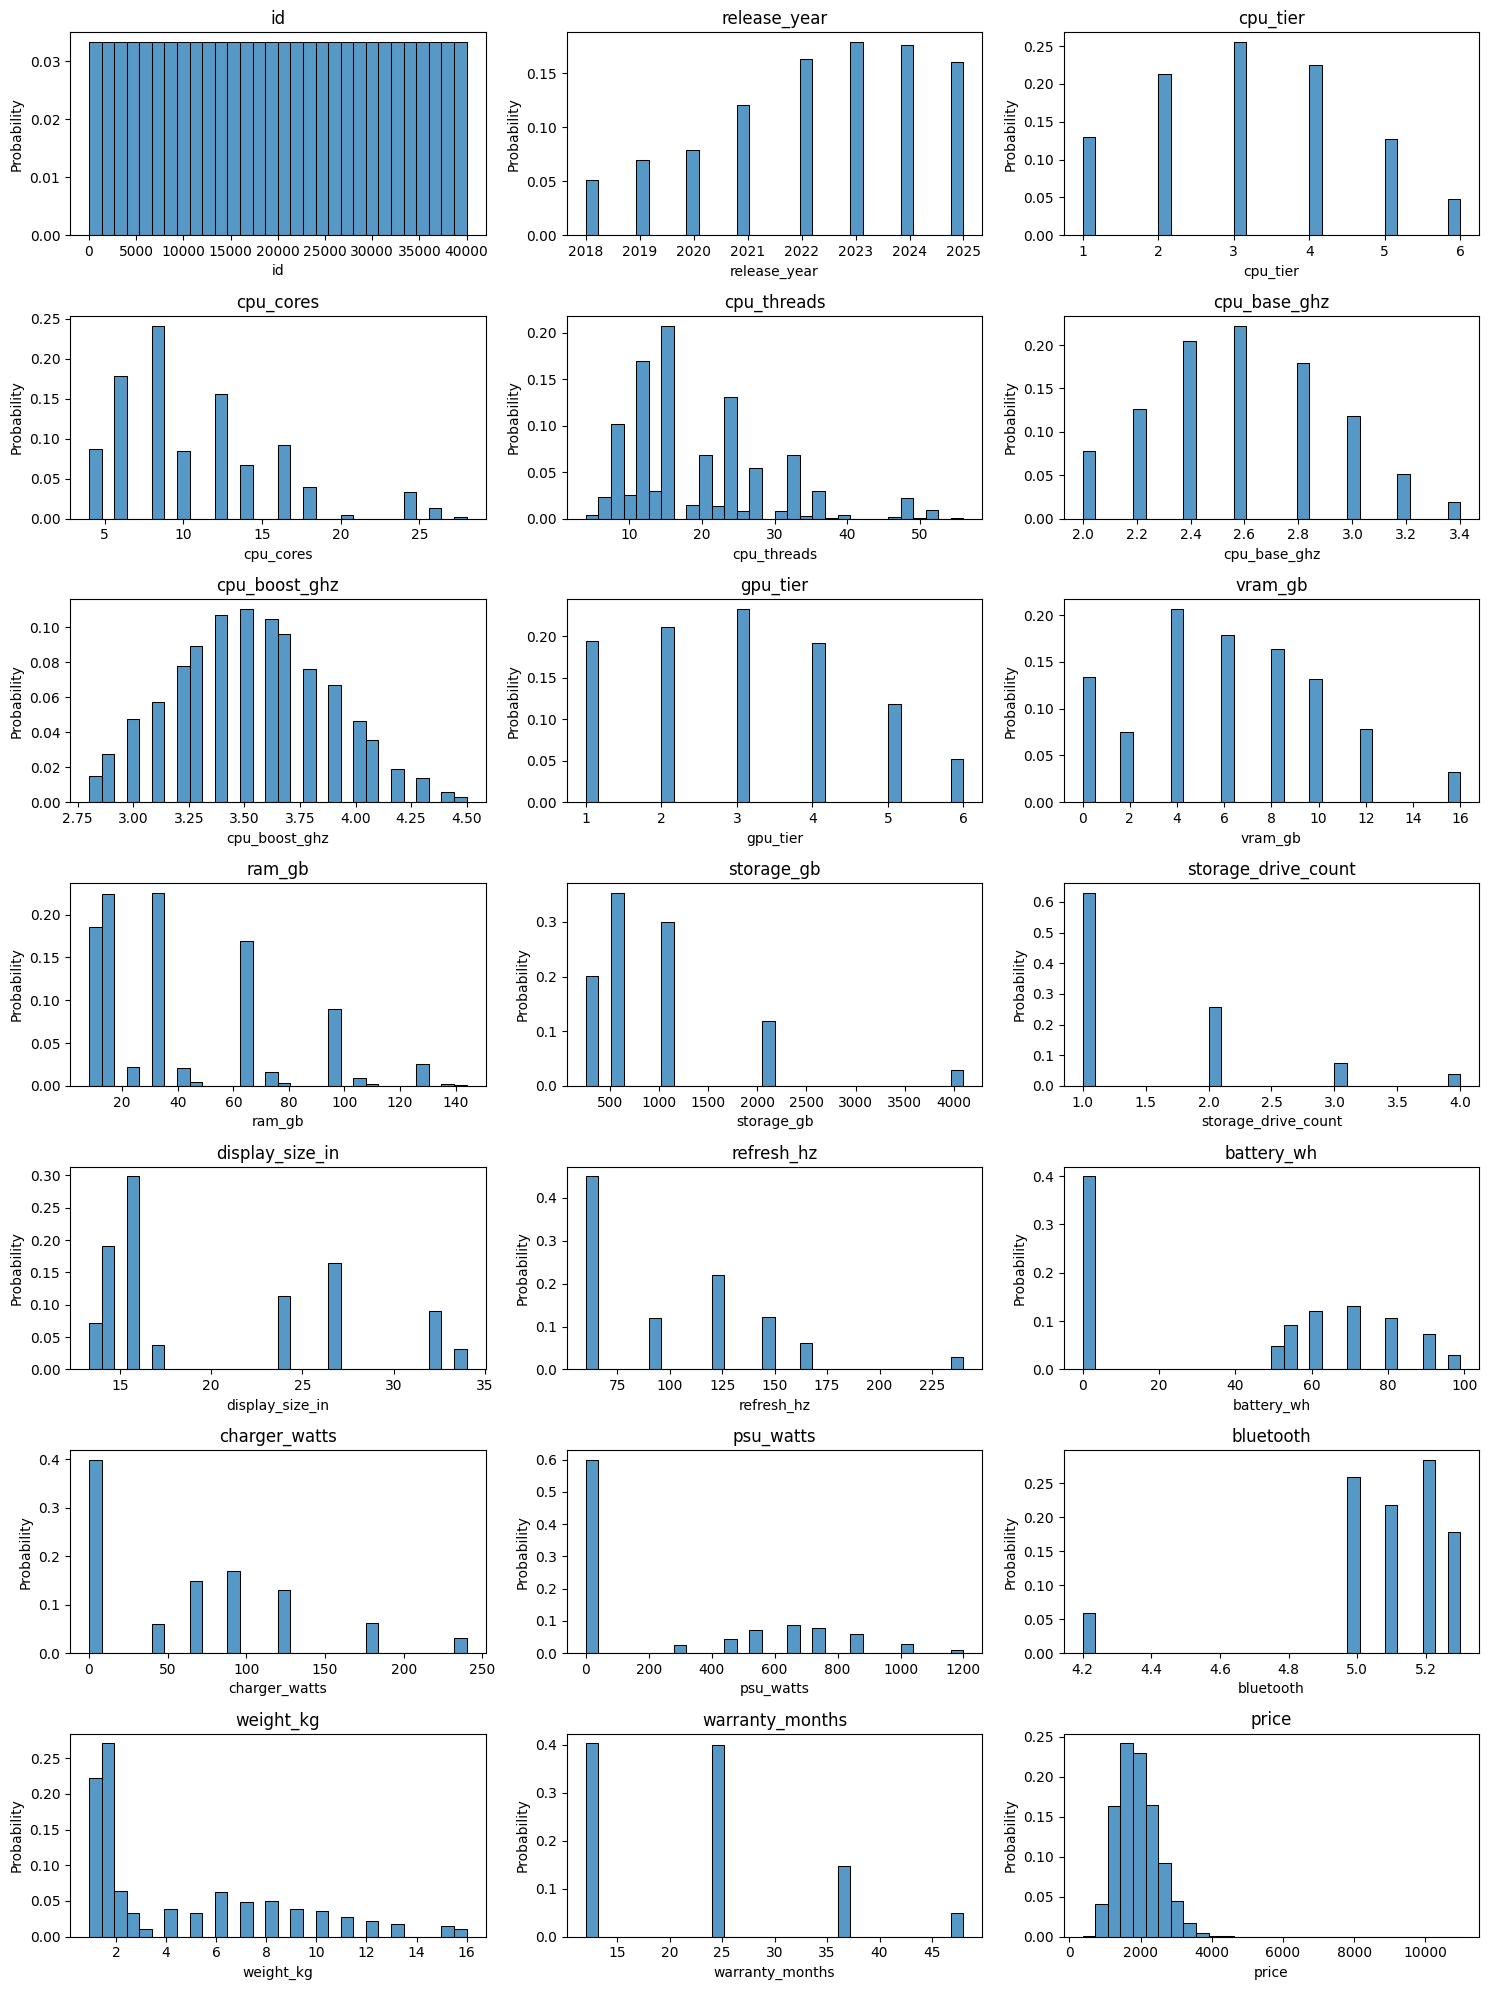

In [8]:
fig, axes = plt.subplots(7, 3, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df_train[col], ax=axes[i], stat='probability', bins=30)
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

unique ratio

In [9]:
unique_ratio = df_train.nunique() / len(df_train)
unique_ratio.apply(lambda x: f"{x:.6f}")

id                     1.000000
device_type            0.000050
brand                  0.000250
model                  0.895000
release_year           0.000200
os                     0.000100
form_factor            0.000250
cpu_brand              0.000075
cpu_model              0.452325
cpu_tier               0.000150
cpu_cores              0.000300
cpu_threads            0.000625
cpu_base_ghz           0.000200
cpu_boost_ghz          0.000450
gpu_brand              0.000100
gpu_model              0.001225
gpu_tier               0.000150
vram_gb                0.000200
ram_gb                 0.000375
storage_type           0.000100
storage_gb             0.000125
storage_drive_count    0.000100
display_type           0.000150
display_size_in        0.000225
resolution             0.000150
refresh_hz             0.000150
battery_wh             0.000200
charger_watts          0.000175
psu_watts              0.000225
wifi                   0.000100
bluetooth              0.000125
weight_k

In [10]:
kolom_kategorikal =  df_train.select_dtypes(include=['object']).columns.tolist()
df_train[kolom_kategorikal].nunique()

device_type         2
brand              10
model           35800
os                  4
form_factor        10
cpu_brand           3
cpu_model       18093
gpu_brand           4
gpu_model          49
storage_type        4
display_type        6
resolution          6
wifi                4
dtype: int64

In [11]:
df_train.isnull().sum()

id                        0
device_type            4000
brand                  4040
model                  4080
release_year           4120
os                     4160
form_factor            4200
cpu_brand              4240
cpu_model              4280
cpu_tier               4320
cpu_cores              4360
cpu_threads            4400
cpu_base_ghz           4440
cpu_boost_ghz          4480
gpu_brand              4520
gpu_model              4560
gpu_tier               4600
vram_gb                4640
ram_gb                 4680
storage_type           4720
storage_gb             4760
storage_drive_count    4800
display_type           4840
display_size_in        4880
resolution             4920
refresh_hz             4960
battery_wh             5000
charger_watts          5040
psu_watts              5080
wifi                   5120
bluetooth              5160
weight_kg              5200
warranty_months        5240
price                     0
dtype: int64

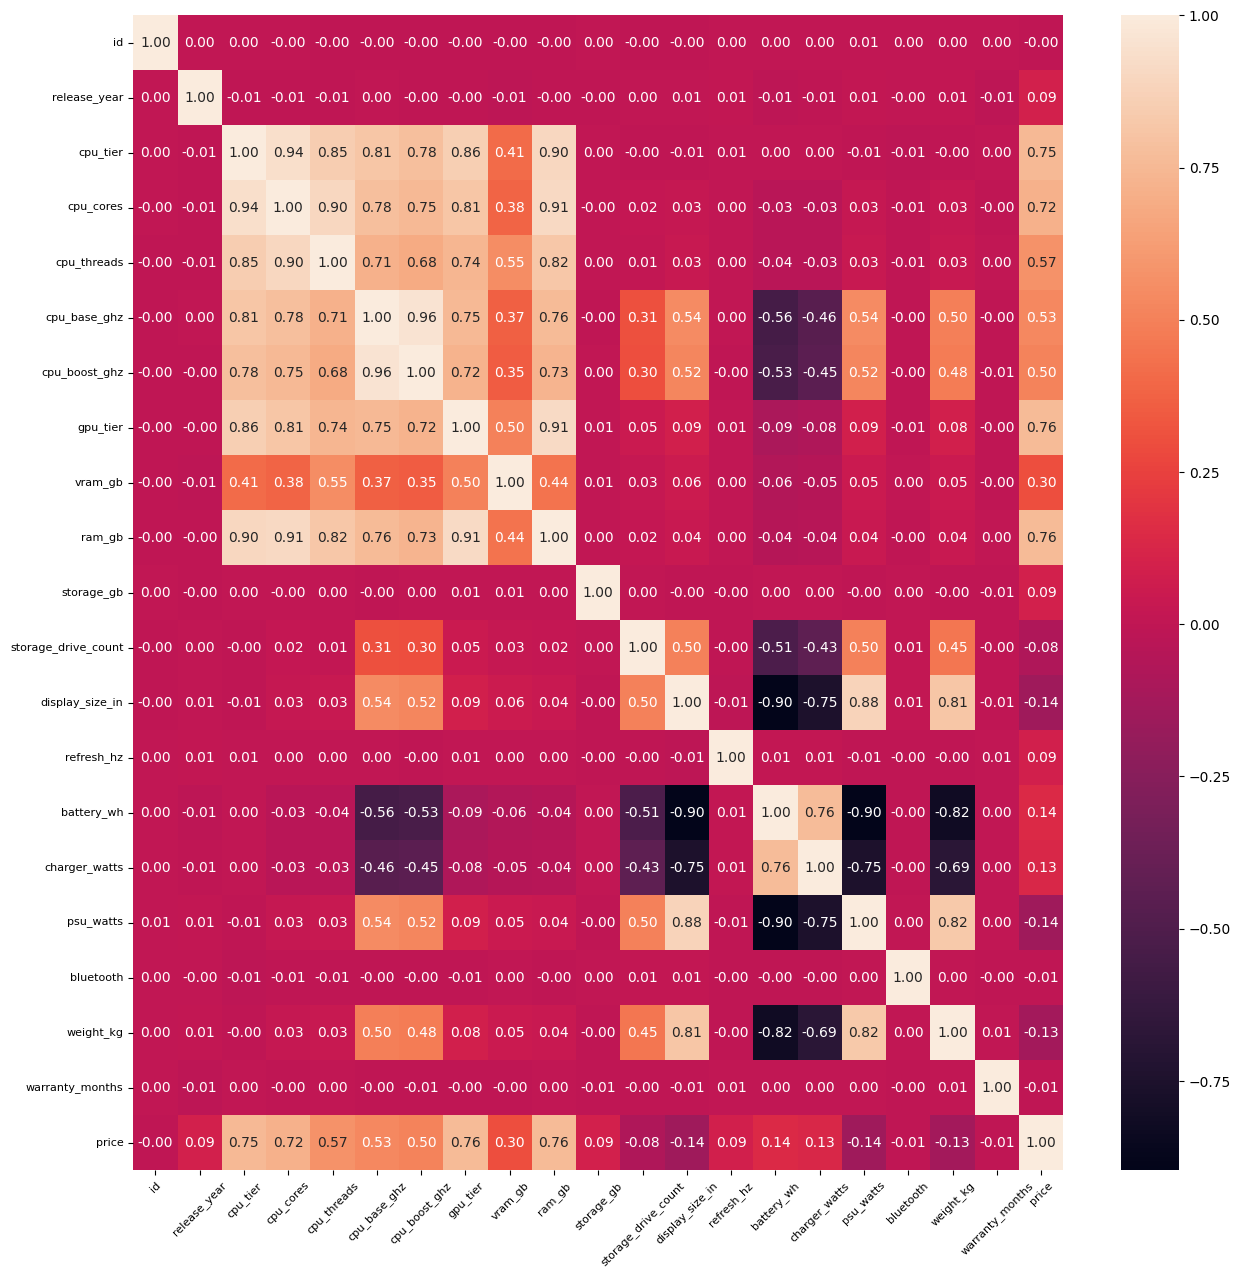

In [12]:
plt.figure(figsize=(15, 15))
korelasi = df_train[kolom_numerik].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Preprocessing

In [ ]:
df_train.drop(columns=['id', 'model'], inplace=True)

In [14]:
X = df_train.drop("price", axis=1)
y = df_train["price"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_test = df_test

Kalau ada kolom yang hilang di val/test, otomatis ditambahin dengan nilai 0

In [ ]:
X_train, X_val  = X_train.align(X_val, join="left", axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

One-hot encode untuk categorical low-cardinality

In [16]:
low_cardinal = [c for c in X_train.select_dtypes(include="object") if X_train[c].nunique() <= 10]

X_train = pd.get_dummies(X_train, columns=low_cardinal, drop_first=True)
X_val   = pd.get_dummies(X_val,   columns=low_cardinal, drop_first=True)
X_test = pd.get_dummies(X_test, columns=low_cardinal, drop_first=True)

Frequency encoding untuk high-cardinality

Misal kategori A muncul 40%, B 30%, C 30%, maka kolom diubah ke [0.4, 0.3, 0.3] sesuai nilai aslinya.

In [17]:
high_cardinal = [c for c in X_train.columns if X_train[c].dtype == "object"]

for c in high_cardinal:
    freq = X_train[c].value_counts(normalize=True)
    X_train[c]     = X_train[c].map(freq).fillna(0)
    X_val[c]       = X_val[c].map(freq).fillna(0)
    X_test[c] = X_test[c].map(freq).fillna(0)

missing value

In [18]:
X_train = X_train.fillna(0)
X_val   = X_val.fillna(0)
X_test = X_test.fillna(0)

# Modeling

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Validasi
y_pred = regressor.predict(X_val)
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
print(f"R2: {r2_score(y_val, y_pred)}")

MSE: 111365.07073135489
MAE: 229.33235107247478
R2: 0.6698129123119707


# Submission

In [20]:
id = df_test['id'].tolist()

y_test = regressor.predict(X_test)
submission_df = pd.DataFrame({'id': id, 'price': y_test})
submission_df.to_csv('submission.csv', index=False)